### Data Preprocessing

In [20]:
### load libraries for data preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [8]:
### load the dataset

df = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
df.shape

(3999, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [11]:
### describe

df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [12]:
### finding null values

df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [13]:
### drop duplicated

df.duplicated().sum()

np.int64(0)

In [15]:
df.drop(columns=['ID#'],inplace=True)

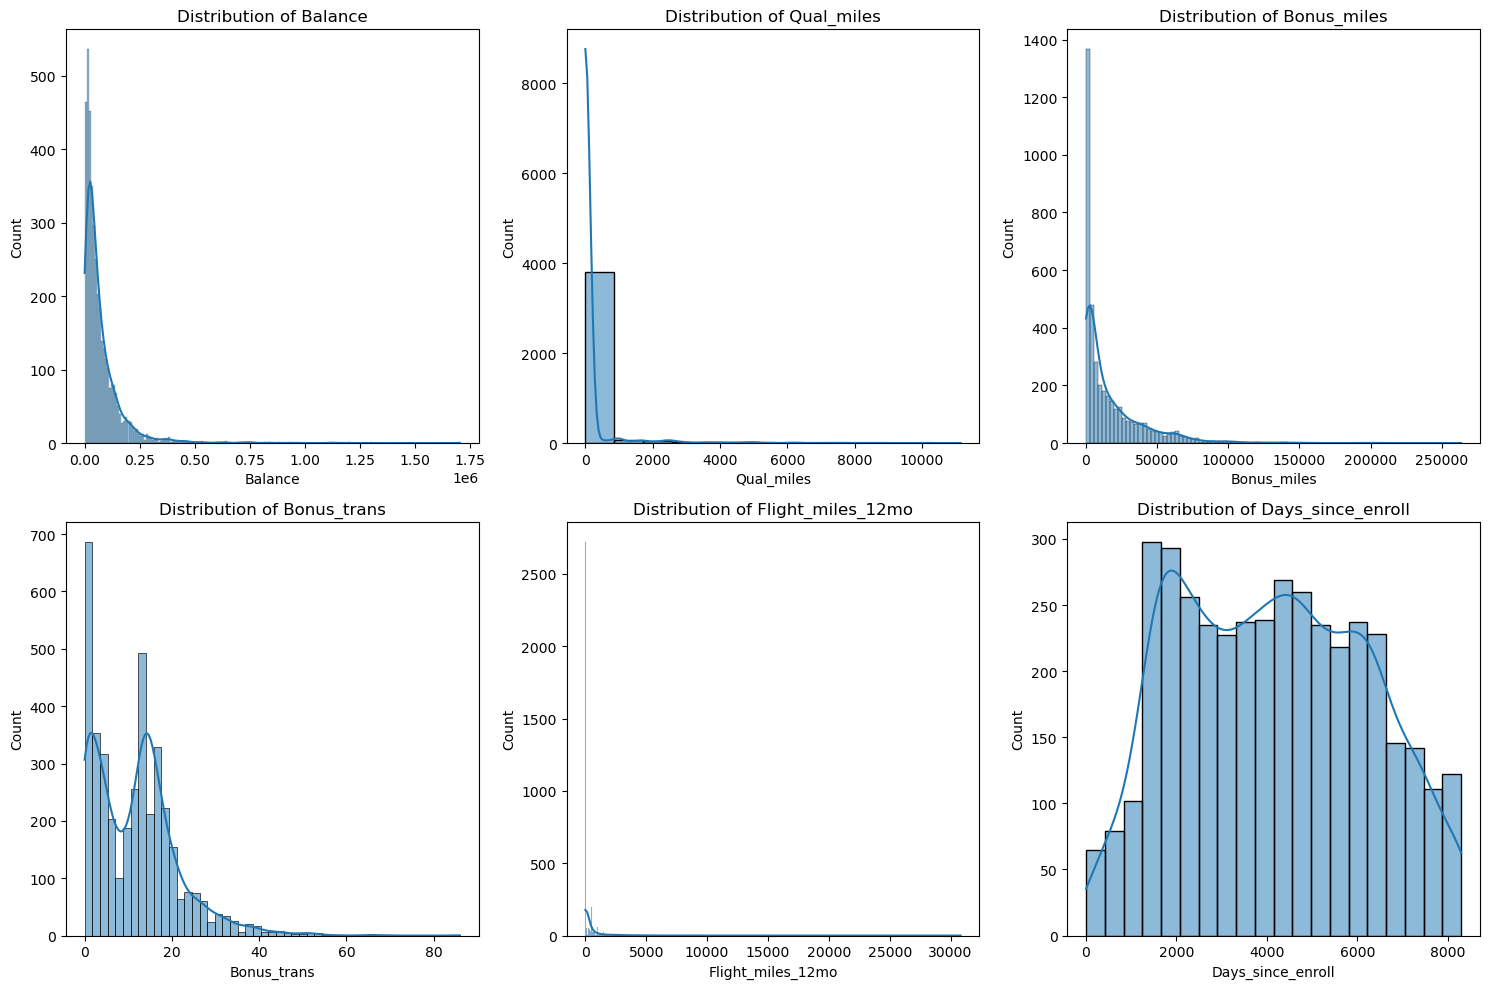

In [17]:
# EDA: Distributions of key variables

plt.figure(figsize=(15, 10))
cols_to_plot = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Days_since_enroll']
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap')

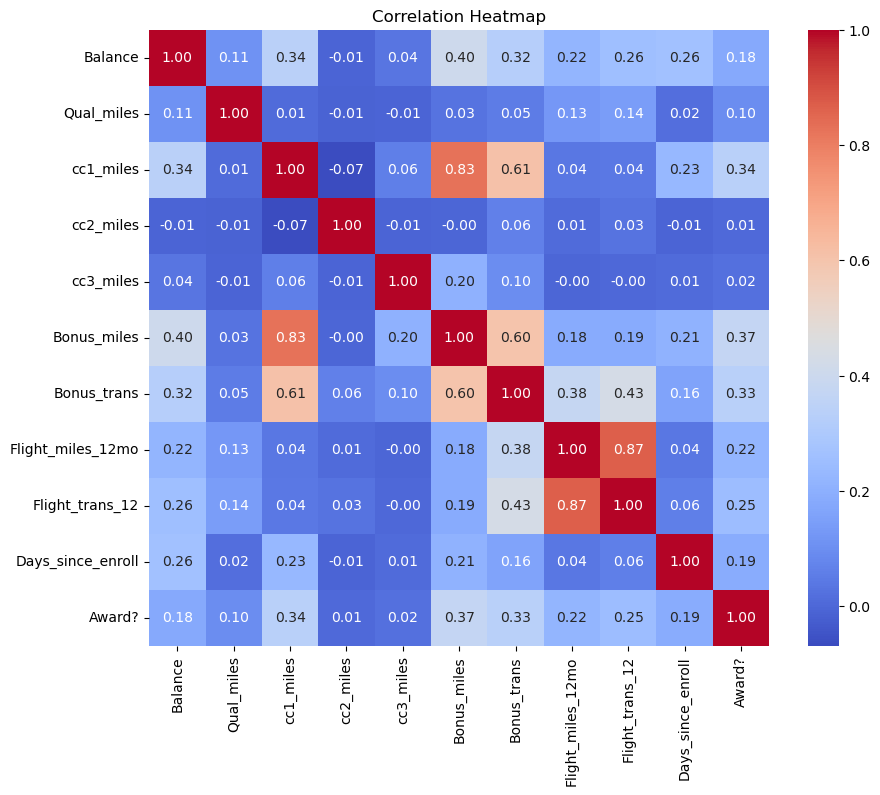

In [19]:
# EDA: Correlation Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

In [22]:
# Scale the data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)

### Implementing Clustering Algorithms

In [29]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [23]:
### Elbow Method for K-Means

wcss = []
silhouette_avg = []
range_n_clusters = range(2, 11)

In [25]:
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(df_scaled, kmeans.labels_))

Text(0.5, 1.0, 'Elbow Method For Optimal k')

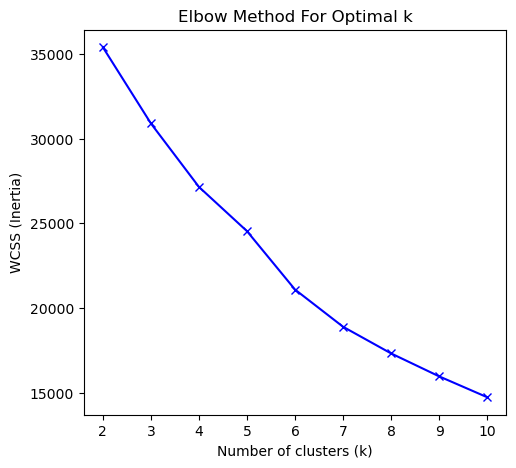

In [26]:
# Plot Elbow Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')

Text(0.5, 1.0, 'Silhouette Scores For Optimal k')

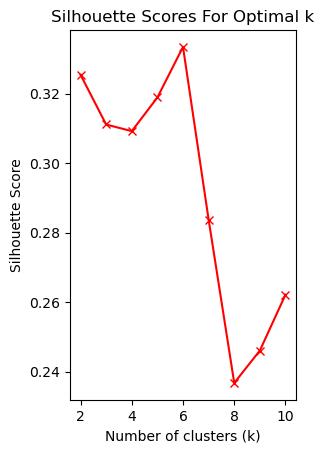

In [27]:
# Plot Silhouette Scores

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_avg, 'rx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Optimal k')

In [28]:
print("WCSS:", wcss)
print("Silhouette Scores:", silhouette_avg)

WCSS: [35409.516629861326, 30906.110883899535, 27154.331168950812, 24541.47129411123, 21089.694784806918, 18891.926703111283, 17316.774877029933, 15961.476009310602, 14728.292655169076]
Silhouette Scores: [np.float64(0.32542136327826215), np.float64(0.3111068089310787), np.float64(0.3091877431362785), np.float64(0.3188772727741292), np.float64(0.33343269189802877), np.float64(0.28372378874116627), np.float64(0.23672499694488633), np.float64(0.24604102202668424), np.float64(0.26212050252510166)]


In [30]:
# Find optimal eps for DBSCAN using K-distance graph
# We'll use min_samples = 2 * n_features = 22

min_samples = 22
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

Text(0, 0.5, 'Epsilon value')

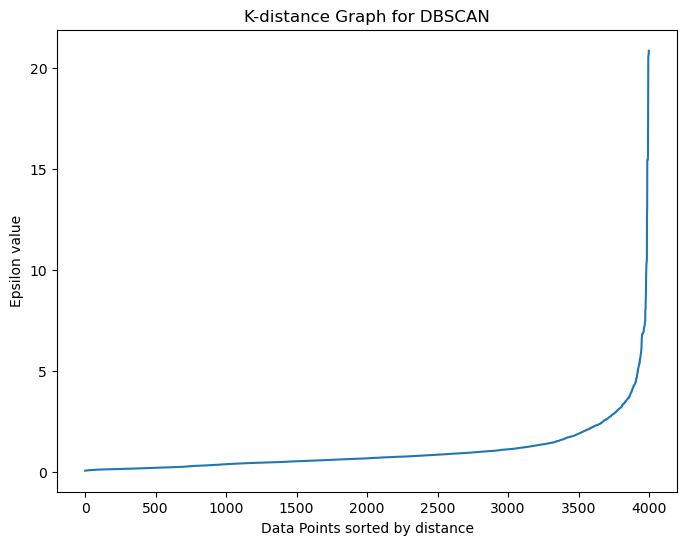

In [31]:
distances = np.sort(distances[:, min_samples-1], axis=0)
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon value')

In [32]:
# Based on the graph, we'll try a few eps values around where the curve starts rising sharply.
# Let's try eps = 0.5, 1.0, 1.5, 2.0
eps_values = [0.5, 1.0, 1.5, 2.0]
dbscan_results = []

In [33]:
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    if n_clusters > 1:
        score = silhouette_score(df_scaled, labels)
    else:
        score = -1 # Silhouette not defined for 1 cluster
    
    dbscan_results.append({'eps': eps, 'clusters': n_clusters, 'noise': n_noise, 'silhouette': score})

In [34]:
dbscan_df = pd.DataFrame(dbscan_results)
print("DBSCAN Results:\n", dbscan_df)

DBSCAN Results:
    eps  clusters  noise  silhouette
0  0.5         5   2158   -0.121305
1  1.0         2    796    0.210098
2  1.5         2    459    0.240323
3  2.0         2    297    0.251543


In [36]:
# Finalize K-Means with k=6
kmeans_final = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(df_scaled)
df['KMeans_Cluster'] = kmeans_labels

### Visualization

In [37]:
from sklearn.decomposition import PCA

In [38]:
# Final Models
kmeans_final = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(df_scaled)

dbscan_final = DBSCAN(eps=2.0, min_samples=22)
dbscan_labels = dbscan_final.fit_predict(df_scaled)

In [40]:
# Add labels to the original dataframe
df_results = df.copy()
df_results['KMeans_Cluster'] = kmeans_labels
df_results['DBSCAN_Cluster'] = dbscan_labels

In [41]:
# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
df_results['PCA1'] = pca_data[:, 0]
df_results['PCA2'] = pca_data[:, 1]

Text(0.5, 1.0, 'K-Means Clustering (k=6) - PCA View')

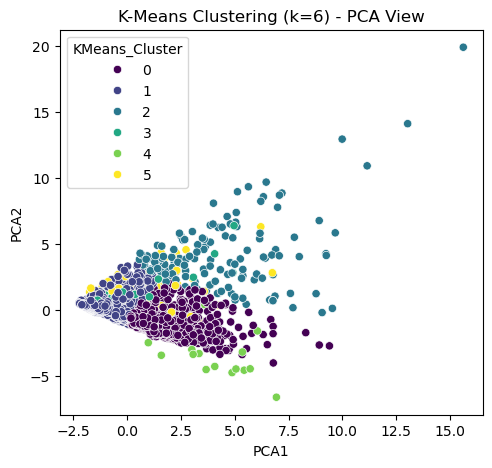

In [42]:
# Visualization: KMeans

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df_results, palette='viridis')
plt.title('K-Means Clustering (k=6) - PCA View')

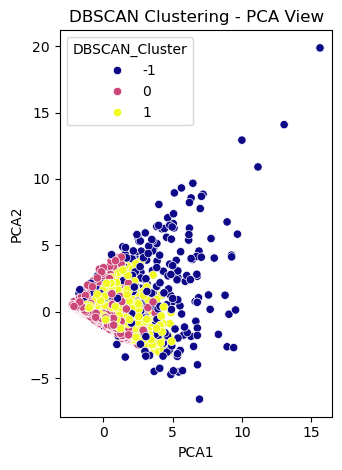

In [43]:
# Visualization: DBSCAN

plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df_results, palette='plasma')
plt.title('DBSCAN Clustering - PCA View')
plt.tight_layout()

In [44]:
# Cluster Interpretation: KMeans Means

kmeans_summary = df_results.groupby('KMeans_Cluster').mean().drop(columns=['DBSCAN_Cluster', 'PCA1', 'PCA2'])
print("K-Means Cluster Summary (Means):")
print(kmeans_summary)

K-Means Cluster Summary (Means):
                      Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                                
0               117306.664804    60.543496   3.705507   1.000000   1.001596   
1                43521.857488    42.440419   1.227456   1.000000   1.000403   
2               188155.664336   464.573427   2.244755   1.000000   1.000000   
3                68876.581395    23.255814   1.139535   2.348837   1.000000   
4               138061.400000    78.800000   3.466667   1.000000   4.066667   
5               119660.491803  5351.065574   2.000000   1.000000   1.000000   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               39273.747007    18.763767         347.403033         1.038308   
1                4610.947665     6.828905         198.170692         0.616345   
2         

In [45]:
# Cluster Interpretation: DBSCAN Means

dbscan_summary = df_results.groupby('DBSCAN_Cluster').mean().drop(columns=['KMeans_Cluster', 'PCA1', 'PCA2'])
print("\nDBSCAN Cluster Summary (Means):")
print(dbscan_summary)


DBSCAN Cluster Summary (Means):
                      Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                                
-1              205612.959596  1433.723906   2.569024   1.195286   1.164983   
 0               57252.671334    30.025535   1.693575   1.000000   1.000000   
 1               73983.653061    60.907378   2.638148   1.000000   1.000000   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBSCAN_Cluster                                                                  
-1              43338.360269    24.020202        2883.043771         8.340067   
 0               9727.007414     8.845552         183.242586         0.542834   
 1              25175.489011    13.959969         422.751962         1.332810   

                Days_since_enroll   Award?  
DBSCAN_Cluster                              
-1                    4631.006734  0.69697  
 0                    3813.399

In [46]:
# Silhouette Scores

kmeans_sil = silhouette_score(df_scaled, kmeans_labels)
dbscan_sil = silhouette_score(df_scaled, dbscan_labels)
print(f"\nFinal Silhouette Scores:\nK-Means: {kmeans_sil}\nDBSCAN: {dbscan_sil}")


Final Silhouette Scores:
K-Means: 0.33343269189802877
DBSCAN: 0.2515425703587439


### Cluster analysis and Interpretstion